In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

%matplotlib inline

# Problem 2:

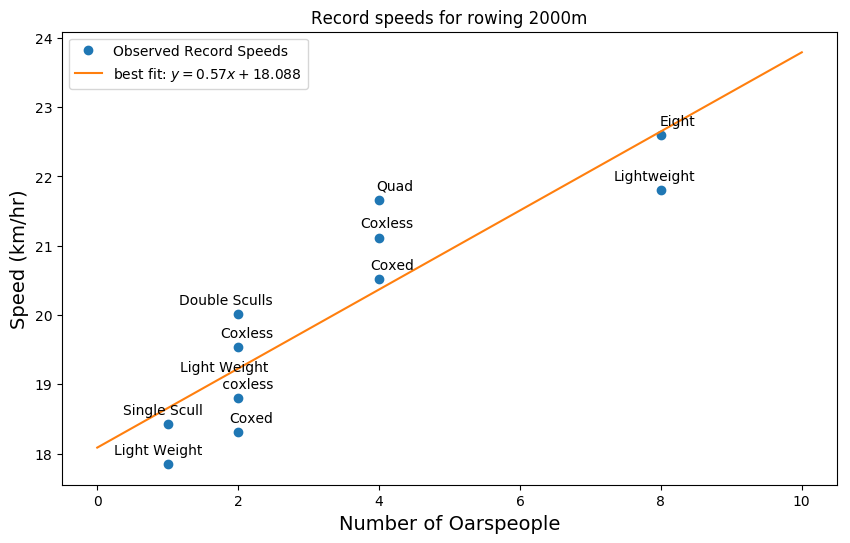

In [52]:
# Source: https://en.wikipedia.org/wiki/List_of_world_records_in_rowing

#number of oarspeople 
N = [1, 1, 2, 2, 2, 2, 4, 4, 4, 8, 8]

#Time (min):
t = [6.5123, 6.723, 6.142, 6.554, 5.995, 6.382, 5.6831, 5.849, 5.539, 5.311, 5.504]

#boat types (Single Scull, Double Sculls, Coxless, Coxed, Eight, Lightweight):
boat_type = ['Single Scull', 'Light Weight', 
             'Coxless', 'Coxed', 'Double Sculls', 
             'Light Weight \n coxless', 'Coxless',
             'Coxed', 'Quad', 'Eight', 'Lightweight']

#derive speed:
def speed(time,n_meters=2000):
    """SPEED: returns a speeds for a 2000 meter rowing race given a vector of finish times
    
            ARGS:
                time    : a list of finish times in minutes
                n_meters: number of meters (default 2000)
    """
    min2sec = [t*60 for t in time]
    vel = [3.6*(n_meters/t) for t in min2sec]
    
    return vel

speeds = speed(t)

#least squares:
slope, intercept, r_value, p_value, std_err = stats.linregress(N, speeds)

x = np.linspace(0,10,100)
y = slope*x + intercept

#plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

plt.plot(N, speeds, 'o', label='Observed Record Speeds ')
plt.plot(x,y, label='best fit:' r' $ y = {}x + {} $'.format(round(slope,3),round(intercept,3)))

plt.title('Record speeds for rowing 2000m')
plt.xlabel('Number of Oarspeople', fontsize=14)
plt.ylabel('Speed (km/hr)', fontsize=14)

#Make pretty:
plt.legend(loc='upper left')
for name, n, s in zip(boat_type, N, speeds):
    plt.annotate(
        name,
        xy=(n, s), xytext=(25, 5),
        textcoords='offset points', ha='right', va='bottom')

plt.show()

In [4]:
print('slope: ', slope)
print('intercept: ', intercept)
print('R_2: ', r_value**2)
print('p_value: ', p_value)

slope:  0.570304837192
intercept:  18.0876298207
R_2:  0.789809407866
p_value:  0.000254536312467


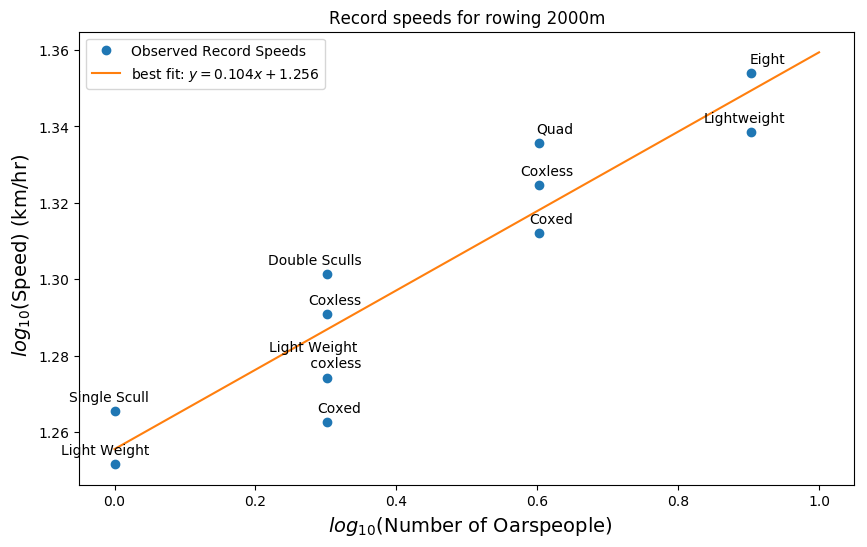

In [53]:
#log-log:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(N), np.log10(speeds))
x = np.linspace(0,1,100)
y = slope*x + intercept
#plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')

plt.plot(np.log10(N), np.log10(speeds), 'o', label='Observed Record Speeds ')
plt.plot(x,y, label='best fit:' r' $ y = {}x + {} $'.format(round(slope,3),round(intercept,3)))

plt.title('Record speeds for rowing 2000m')
plt.xlabel(r' $ log_{10} $(Number of Oarspeople)', fontsize=14)
plt.ylabel(r' $log_{10} $(Speed) (km/hr)', fontsize=14)

#Make pretty:
plt.legend(loc='upper left')
for name, n, s in zip(boat_type, np.log10(N), np.log10(speeds)):
    plt.annotate(
        name,
        xy=(n, s), xytext=(25, 5),
        textcoords='offset points', ha='right', va='bottom')

plt.show()

In [55]:
print(r_value**2)
print(p_value)

0.866606791579
3.16999389273e-05


# Problem 3:

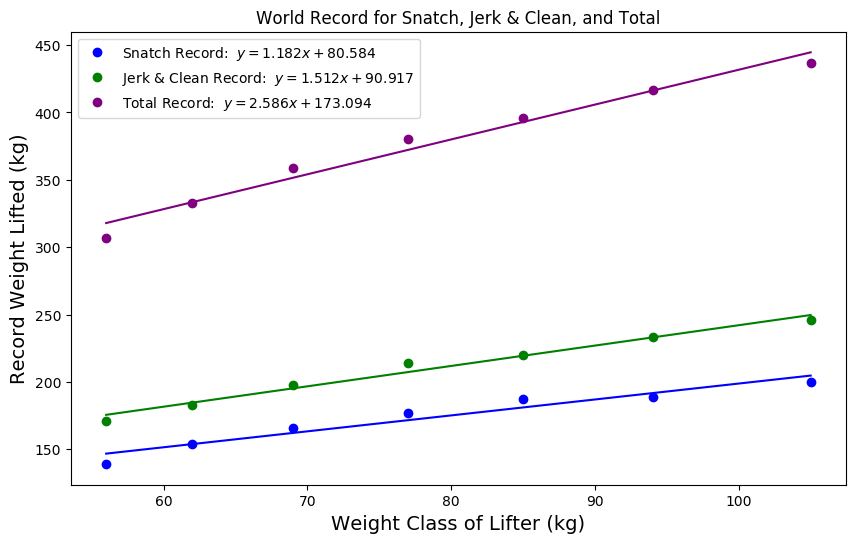

In [6]:
#Source: https://en.wikipedia.org/wiki/List_of_world_records_in_Olympic_weightlifting

#weights:
weight_classes = np.array([56, 62, 69, 77, 85, 94, 105])

#records:
snatch = np.array([139, 154, 166, 177, 187, 189, 200])
jercln = np.array([171, 183, 198, 214, 220, 233, 246])
total  = np.array([307, 333, 359, 380, 396, 417, 437])

#regressions:
logwc = np.log10(weight_classes)

slope_s, intercept_s, r_value_s, p_value_s, std_err_s = stats.linregress(weight_classes, snatch)
slope_jc, intercept_jc, r_value_jc, p_value_jc, std_err_jc = stats.linregress(weight_classes, jercln)
slope_t, intercept_t, r_value_t, p_value_t, std_err_t = stats.linregress(weight_classes, total)

ys = slope_s * weight_classes + intercept_s
yjc = slope_jc * weight_classes + intercept_jc
yt = slope_t * weight_classes + intercept_t

x = np.linspace(0,1,7)
#plot:
plt.figure( figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(weight_classes, snatch, 'o', color='blue', 
         label='Snatch Record: ' r' $ y = {}x + {} $'.format(round(slope_s,3),round(intercept_s,3)))
plt.plot(weight_classes, ys, color='blue')
plt.plot(weight_classes, jercln, 'o', color='green', 
         label='Jerk & Clean Record: ' r' $ y = {}x + {} $'.format(round(slope_jc,3),round(intercept_jc,3)))
plt.plot(weight_classes, yjc, color='green')
plt.plot(weight_classes, total, 'o', color='purple', 
         label='Total Record: ' r' $ y = {}x + {} $'.format(round(slope_t,3),round(intercept_t,3)))
plt.plot(weight_classes, yt, color='purple')

plt.xlabel('Weight Class of Lifter (kg)', fontsize=14)
plt.ylabel('Record Weight Lifted (kg)', fontsize=14)
plt.title('World Record for Snatch, Jerk & Clean, and Total')

plt.legend(loc='upper left')

plt.show()

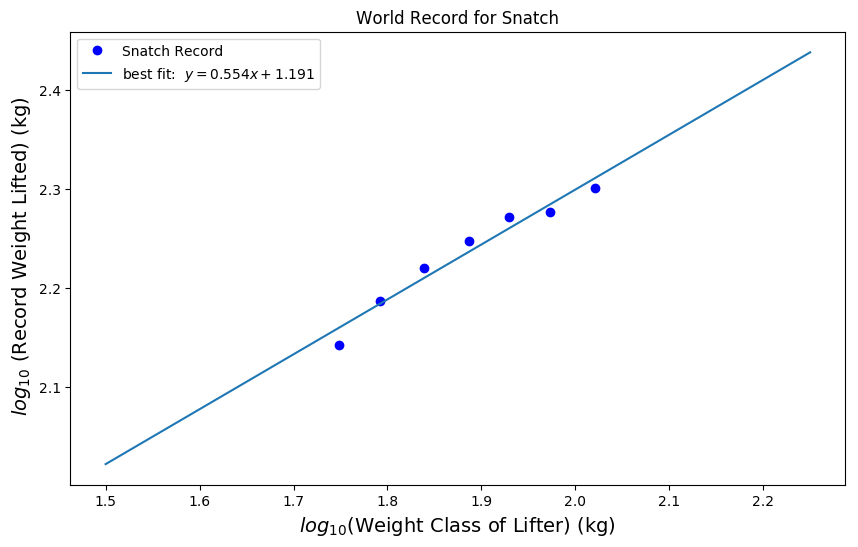

In [7]:
log_snatch = np.log10(snatch)
slope_s, intercept_s, r_value_s, p_value_s, std_err_s = stats.linregress(logwc, log_snatch)
x = np.linspace(1.5,2.25,100)
y = np.multiply(slope_s, x) + intercept_s
plt.figure( figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(logwc, log_snatch, 'o', color='blue', label='Snatch Record')
plt.plot(x, y, label='best fit: ' r' $ y = {}x + {} $'.format(round(slope_s,3),round(intercept_s,3)))

plt.xlabel(r'$ log_{10} $(Weight Class of Lifter) (kg)', fontsize=14)
plt.ylabel(r' $ log_{10} $ (Record Weight Lifted) (kg)', fontsize=14)
plt.title('World Record for Snatch')

plt.legend(loc='upper left')

plt.show()

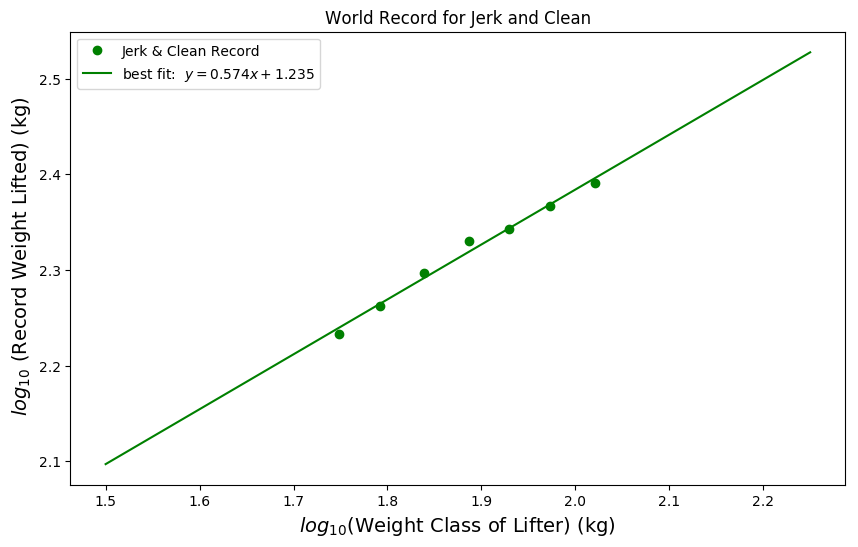

In [8]:
log_jercln = np.log10(jercln)
slope_jc, intercept_jc, r_value_jc, p_value_jc, std_err_jc = stats.linregress(logwc, log_jercln)
x = np.linspace(1.5,2.25,100)
y = np.multiply(slope_jc, x) + intercept_jc
plt.figure( figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(logwc, log_jercln, 'o', color='green', label='Jerk & Clean Record')
plt.plot(x, y, color= 'green',
         label='best fit: ' r' $ y = {}x + {} $'.format(round(slope_jc,3),round(intercept_jc,3)))

plt.xlabel(r'$ log_{10} $(Weight Class of Lifter) (kg)', fontsize=14)
plt.ylabel(r' $ log_{10} $ (Record Weight Lifted) (kg)', fontsize=14)
plt.title('World Record for Jerk and Clean')

plt.legend(loc='upper left')

plt.show()

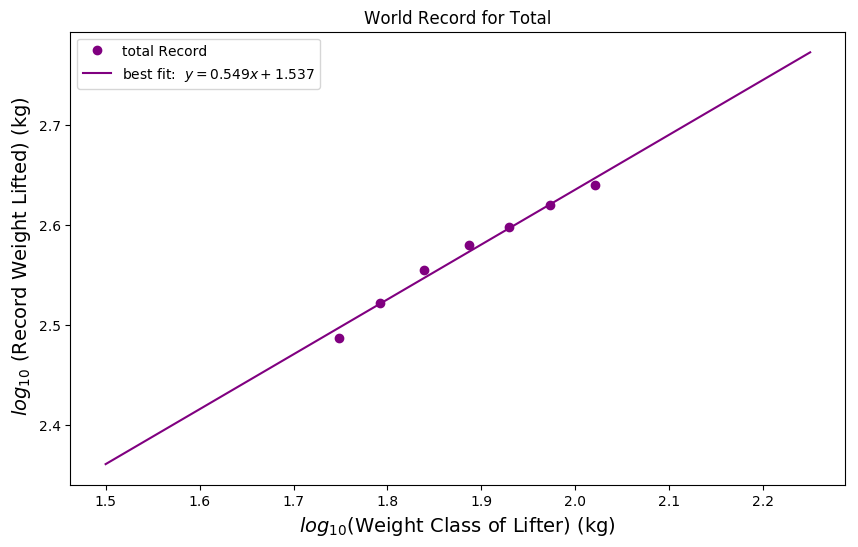

In [9]:
log_tot = np.log10(total)
slope_t, intercept_t, r_value_t, p_value_t, std_err_t = stats.linregress(logwc, log_tot)
x = np.linspace(1.5,2.25,100)
y = np.multiply(slope_t, x) + intercept_t
plt.figure( figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(logwc, log_tot, 'o', color='purple', label='total Record')
plt.plot(x, y, color='purple',
         label='best fit: ' r' $ y = {}x + {} $'.format(round(slope_t,3),round(intercept_t,3)))

plt.xlabel(r'$ log_{10} $(Weight Class of Lifter) (kg)', fontsize=14)
plt.ylabel(r' $ log_{10} $ (Record Weight Lifted) (kg)', fontsize=14)
plt.title('World Record for Total')

plt.legend(loc='upper left')

plt.show()

In [17]:
norm_snatch = np.divide(snatch,weight_classes)
norm_jrcln  = np.divide(jercln,weight_classes)
norm_total  = np.divide(total,weight_classes)

log_norm_snatch = np.log10(norm_snatch)
log_norm_jrcln = np.log10(norm_jrcln)
log_norm_total = np.log10(norm_total)

In [18]:
norm_snatch

array([ 2.48214286,  2.48387097,  2.4057971 ,  2.2987013 ,  2.2       ,
        2.0106383 ,  1.9047619 ])

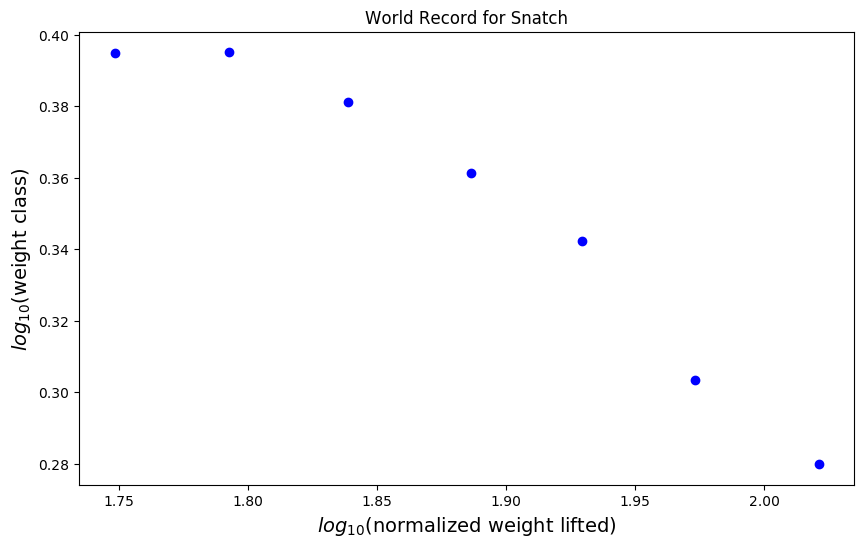

In [22]:
plt.figure( figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
slope_s, intercept_s, r_value_s, p_value_s, std_err_s = stats.linregress(logwc, log_norm_snatch)

plt.title('World Record for Snatch')
plt.xlabel(r'$log_{10}$(normalized weight lifted)',fontsize=14)
plt.ylabel(r'$log_{10}$(weight class)',fontsize=14)
plt.plot(logwc, log_norm_snatch, 'o', color='blue')
plt.show()

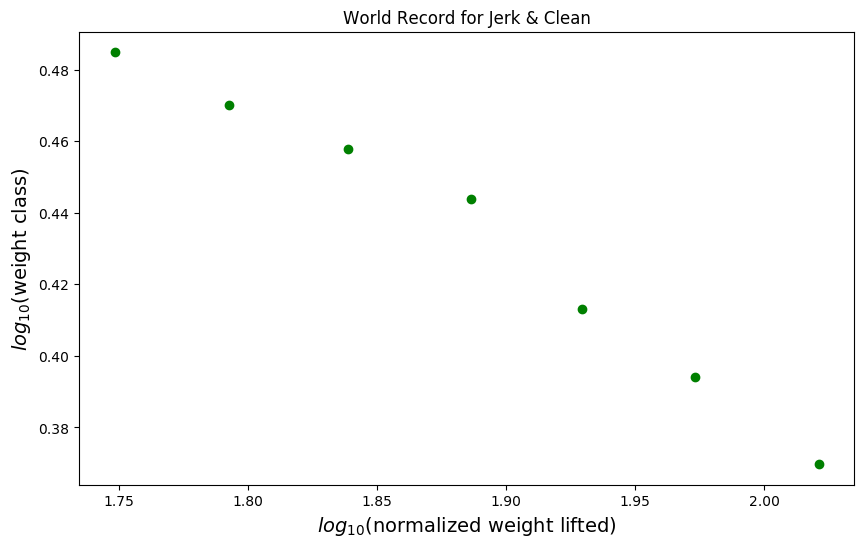

In [23]:
plt.figure( figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
slope_jr, intercept_jr, r_value_jr, p_value_jr, std_err_jr = stats.linregress(logwc, log_norm_jrcln)

plt.title('World Record for Jerk & Clean')
plt.xlabel(r'$log_{10}$(normalized weight lifted)',fontsize=14)
plt.ylabel(r'$log_{10}$(weight class)',fontsize=14)
plt.plot(logwc, log_norm_jrcln, 'o', color='green')
plt.show()

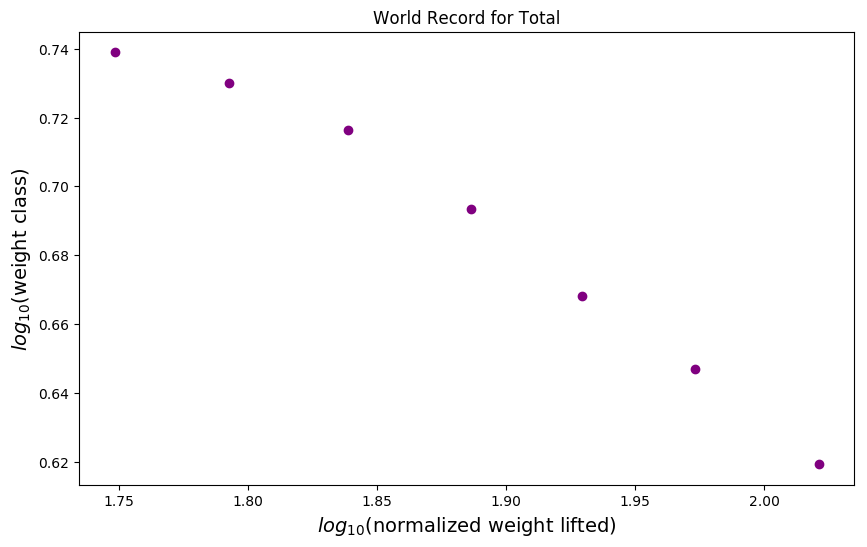

In [24]:
plt.figure( figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
slope_t, intercept_t, r_value_t, p_value_t, std_err_t = stats.linregress(logwc, log_norm_total)

plt.title('World Record for Total')
plt.xlabel(r'$log_{10}$(normalized weight lifted)',fontsize=14)
plt.ylabel(r'$log_{10}$(weight class)',fontsize=14)
plt.plot(logwc, log_norm_total, 'o', color='purple')
plt.show()

# Problem 7:

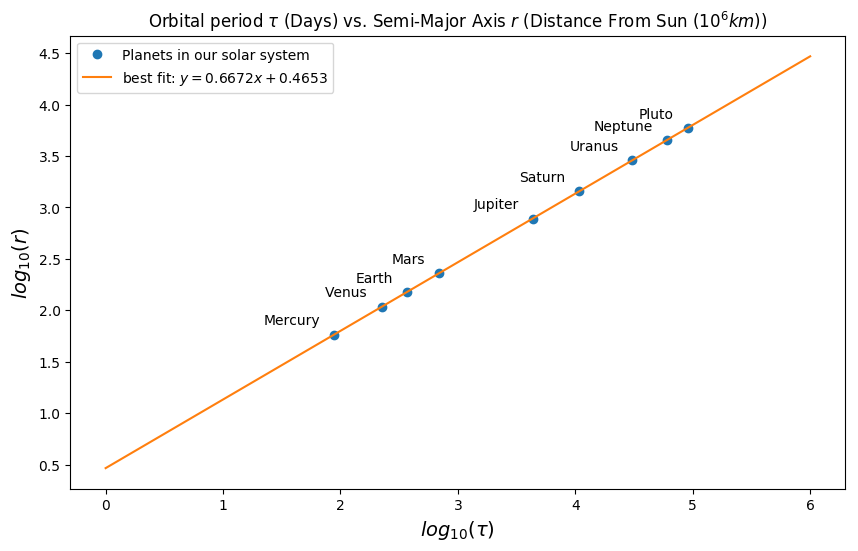

In [25]:
#pt D: #from NASA: https://nssdc.gsfc.nasa.gov/planetary/factsheet/

#ORDER: Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune, Pluto
planet_names = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto']

#orbital period:
t = np.array([88.0, 224.7, 365.2, 687.0, 4331, 10747, 30589, 59800, 90560])

#semi-major axis:
r = np.array([57.9, 108.2, 149.6, 227.9, 778.6, 1433.5, 2872.5, 4495.1, 5906.4])

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(t),np.log10(r))

x = np.linspace(0, 6,100)
y = slope*x + intercept

s = round(slope,4)
i = round(intercept,4)
#plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(np.log10(t), np.log10(r), 'o', label = 'Planets in our solar system')
plt.plot(x,y, label='best fit: 'r'$ y = {}x + {} $'.format(s,i))

#make pretty:)
plt.title('Orbital period ' r'$ \tau $ (Days) vs. Semi-Major Axis ' r'$ r $ (Distance From Sun' r' $ (10^6 km) $)')
plt.xlabel(r'$log_{10}( \tau )$', fontsize=14)
plt.ylabel(r'$ log_{10}(r) $', fontsize=14)
plt.legend(loc='upper left')
for name, t, r in zip(planet_names, np.log10(t), np.log10(r)):
    plt.annotate(
        name,
        xy=(t, r), xytext=(-10, 5),
        textcoords='offset points', ha='right', va='bottom')

plt.show()

In [26]:
print('R_2 value: ',r_value**2)
print('p_value:   ',p_value)

R_2 value:  0.999999099012
p_value:    2.02045012541e-22


In [27]:
slope

0.6672000380519959

In [28]:
intercept

0.46529664082677025

# Problem 8

In [29]:
def surface(g1,g2,g3,V):
    return np.sum(np.power(V,g1+g2),np.power(V,g1+g3),np.power(V,g2+g3))

In [30]:
#gammas:
g_1 = np.linspace(0,1,100)
g_2 = np.linspace(0,1,100)
g_3 = np.linspace(0,1,100)


gammas= []
#Volume:
V = np.linspace(0,100,1000)

SA = []

for gamma_3 in g_3:
    for gamma_2 in g_2:
        for gamma_1 in g_3:
            if gamma_3 + gamma_2 + gamma_1 == 1 and gamma_3 >= gamma_2 >= gamma_1:
                gammas.append([gamma_1, gamma_2, gamma_3])


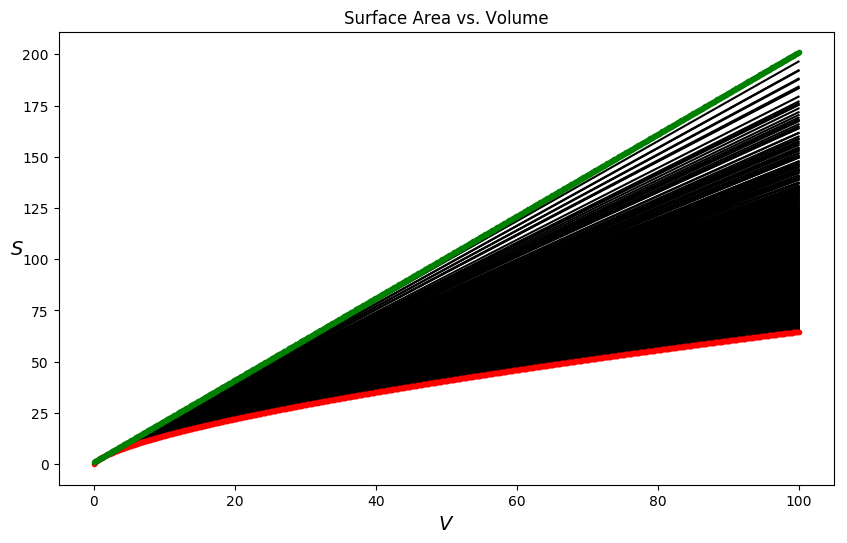

In [51]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title('Surface Area vs. Volume')
plt.ylabel(r'$ S $',rotation='horizontal',fontsize=14)
plt.xlabel(r'$ V $',fontsize=14)
for params in gammas:
    plt.plot(V, np.power(V,params[0]+params[1])+np.power(V,params[0]+params[2]) + np.power(V,params[1]+params[2]),
             '-', color='black')
    
#isometric scaling:
plt.plot(V, np.power(V,gammas[0][0]+gammas[0][1])+np.power(V,gammas[0][0]+gammas[0][2]) + np.power(V,gammas[0][1]+gammas[0][2]),
             '.', color='red')

#allometric scaling:
plt.plot(V, np.power(V,gammas[674][0]+gammas[674][1])+np.power(V,gammas[674][0]+gammas[674][2]) + np.power(V,gammas[674][1]+gammas[674][2]),
             '.', color='green')

In [40]:
gammas[0]

[0.33333333333333337, 0.33333333333333337, 0.33333333333333337]

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


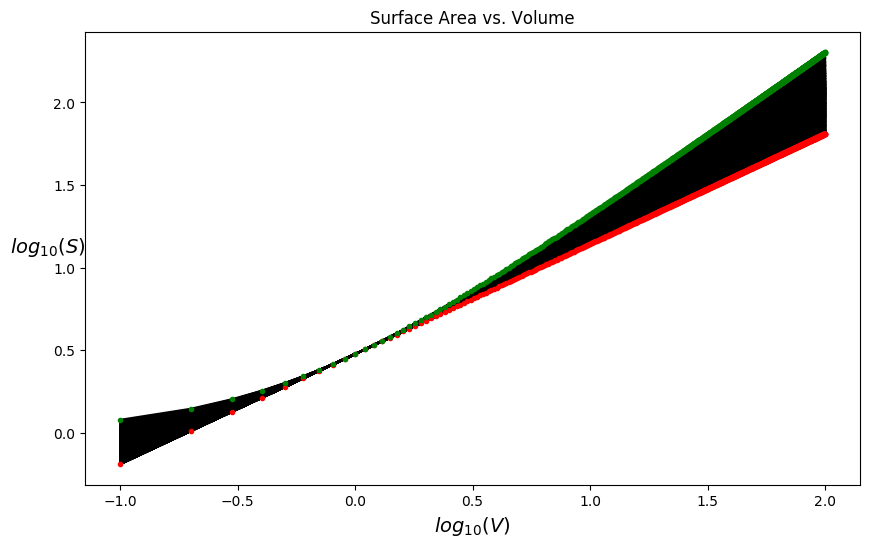

In [50]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title('Surface Area vs. Volume')
plt.ylabel(r'$ log_{10}(S) $',rotation='horizontal',fontsize=14)
plt.xlabel(r'$ log_{10}(V) $',fontsize=14)
for params in gammas:
    plt.plot(np.log10(V), np.log10(np.power(V,params[0]+params[1])+np.power(V,params[0]+params[2]) + np.power(V,params[1]+params[2])),
             '-', color='black')
    
#isometric scaling
plt.plot(np.log10(V), np.log10(np.power(V,gammas[0][0]+gammas[0][1])+np.power(V,gammas[0][0]+gammas[0][2]) + np.power(V,gammas[0][1]+gammas[0][2])),
             '.', color='red')

#allometric 
plt.plot(np.log10(V), np.log10(np.power(V,gammas[674][0]+gammas[674][1])+np.power(V,gammas[674][0]+gammas[674][2]) + np.power(V,gammas[674][1]+gammas[674][2])),
             '.', color='green')

In [49]:
gammas[674]

[0.0, 0.0, 1.0]